# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [9]:
import pandas as pd

# Tentativa final com separador vírgula
df_sinasc = pd.read_csv("SINASC_RO_2019.csv", sep=",", encoding="latin1")

# Remover aspas dos nomes das colunas
df_sinasc.columns = df_sinasc.columns.str.replace('"', '').str.strip()

# Visualizar as primeiras linhas corretamente
df_sinasc.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,RondÃ´nia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,RondÃ´nia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,RondÃ´nia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,RondÃ´nia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,RondÃ´nia,-11.93554,-61.99982,338.0,7067.025


####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

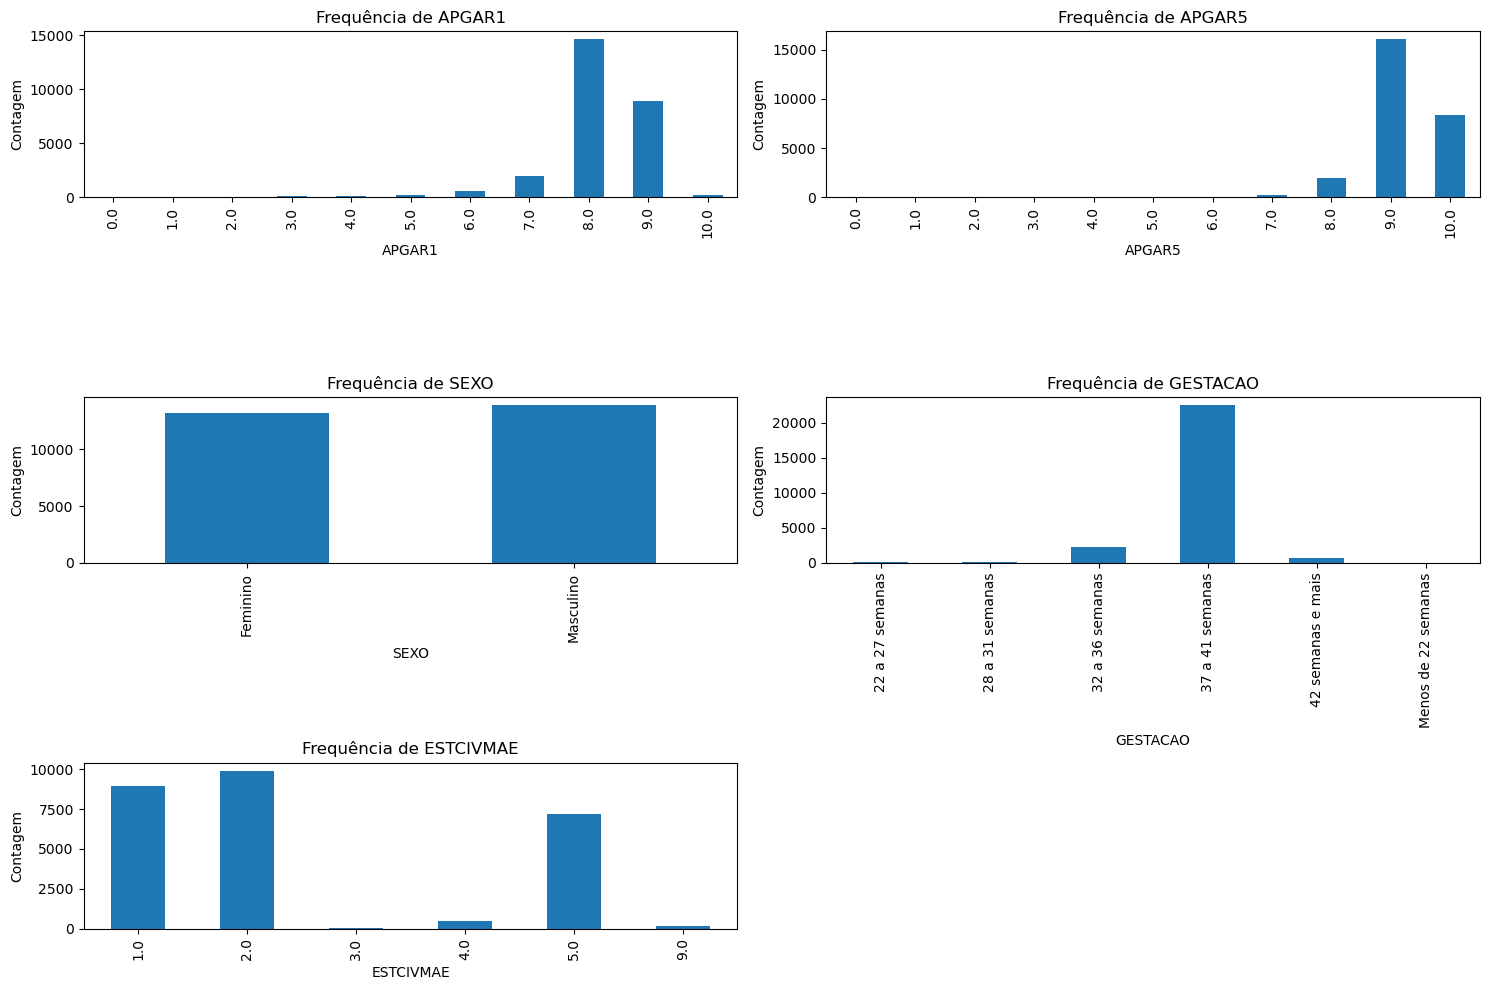

In [11]:
import matplotlib.pyplot as plt

# Carregar o arquivo (ajuste o caminho se necessário)
df_sinasc = pd.read_csv("SINASC_RO_2019.csv", sep=",", encoding="latin1")
df_sinasc.columns = df_sinasc.columns.str.replace('"', '').str.strip()

# Lista de variáveis para os gráficos
variaveis = ['APGAR1', 'APGAR5', 'SEXO', 'GESTACAO', 'ESTCIVMAE']

# Plotar os gráficos
plt.figure(figsize=(15, 10))
for i, var in enumerate(variaveis, 1):
    plt.subplot(3, 2, i)
    df_sinasc[var].value_counts().sort_index().plot(kind='bar')
    plt.title(f'Frequência de {var}')
    plt.xlabel(var)
    plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

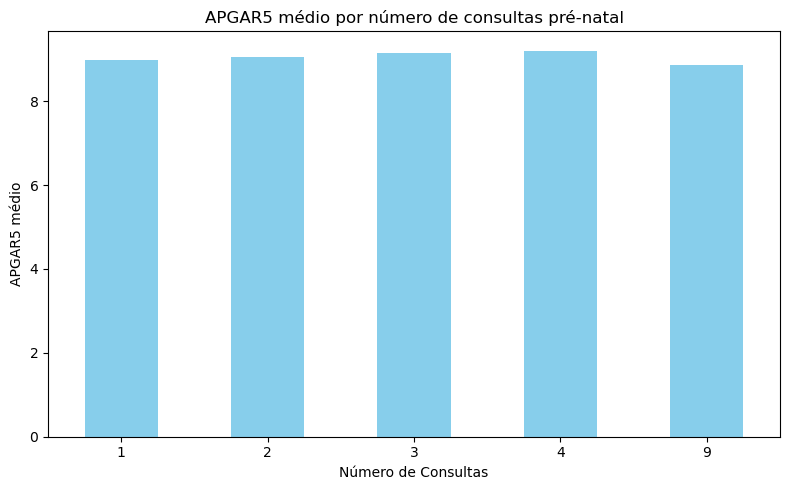

In [12]:
# Garantir que as colunas estão limpas
df_sinasc.columns = df_sinasc.columns.str.replace('"', '').str.strip()

# Agrupar e calcular a média do APGAR5 por número de consultas
media_apgar5 = df_sinasc.groupby('CONSULTAS')['APGAR5'].mean().sort_index()

# Plotar gráfico de barras
plt.figure(figsize=(8, 5))
media_apgar5.plot(kind='bar', color='skyblue')
plt.title('APGAR5 médio por número de consultas pré-natal')
plt.xlabel('Número de Consultas')
plt.ylabel('APGAR5 médio')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

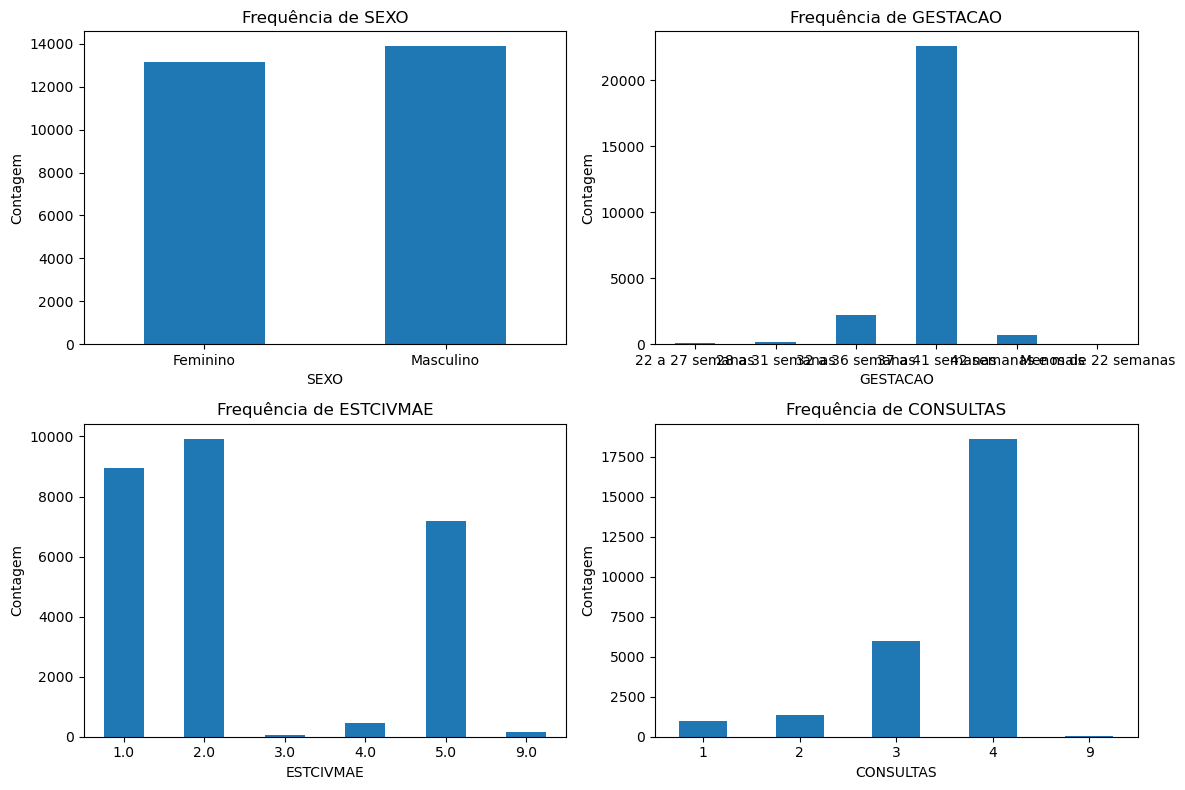

In [14]:
# Variáveis selecionadas
variaveis_painel = ['SEXO', 'GESTACAO', 'ESTCIVMAE', 'CONSULTAS']

# Criar painel de 2x2
plt.figure(figsize=(12, 8))
for i, var in enumerate(variaveis_painel, 1):
    plt.subplot(2, 2, i)
    df_sinasc[var].value_counts().sort_index().plot(kind='bar')
    plt.title(f'Frequência de {var}')
    plt.xlabel(var)
    plt.ylabel('Contagem')
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()